In [0]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [0]:
# Import learning packages

#!pip install tensorflow==2.0.0

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [0]:
# Load dataset

from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

Using TensorFlow backend.


In [0]:
print("Training Data: ")
print(X.shape)
print(y.shape)

Training Data: 
(50000,)
(50000,)


In [0]:
print("Number of Unique Words: ")
print(len(np.unique(np.hstack(X))))

Number of Unique Words: 
88585


In [0]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [0]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [0]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(
  X_train, y_train, 
  validation_data=(X_test, y_test), 
  epochs=5, 
  batch_size=128, 
  verbose=1
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 27s 1ms/sample - loss: 0.4924 - accuracy: 0.7295 - val_loss: 0.2965 - val_accuracy: 0.8728
Epoch 2/5
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.1774 - accuracy: 0.9329 - val_loss: 0.3077 - val_accuracy: 0.8719
Epoch 3/5
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.0479 - accuracy: 0.9876 - val_loss: 0.4115 - val_accuracy: 0.8636
Epoch 4/5
25000/25000 [==============================] - 27s 1ms/sample - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.5290 - val_accuracy: 0.8596
Epoch 5/5
25000/25000 [==============================] - 27s 1ms/sample - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5559 - val_accuracy: 0.8656


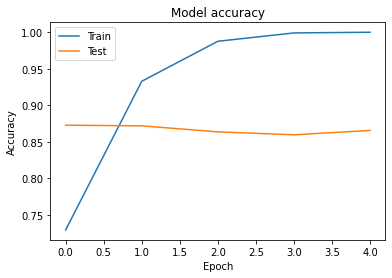

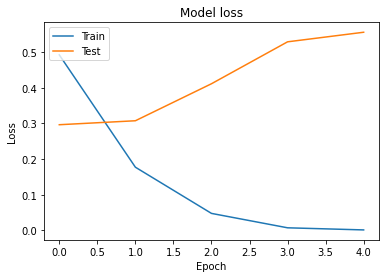

In [0]:
# Plot traing and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()